# Sales, Salary and Profit Analytics Demo

Author: **Aravind**

This notebook demonstrates how to:
- Load the sample 3-year dataset
- Analyse sales, salary expenses and profit
- Train a simple revenue prediction model


In [21]:
import os
import sys
from pathlib import Path

# 🔹 Set your project root explicitly:
PROJECT_ROOT = Path(r"C:\Salesproj\SalesAnalyticsVS\SalesAnalytics")

# Change working directory to project root
os.chdir(PROJECT_ROOT)
print("New CWD:", Path.cwd())

# Make sure Python can see src/
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))


New CWD: C:\Salesproj\SalesAnalyticsVS\SalesAnalytics


In [22]:
import pandas as pd
from pathlib import Path

from src.analysis import load_financial_data, basic_kpis, train_sales_model
from src.company import Company

FINANCIAL_PATH = PROJECT_ROOT / "data" / "raw" / "company_sales_salary.csv"
EMPLOYEES_PATH = PROJECT_ROOT / "data" / "raw" / "employees.csv"

print("Financial CSV:", FINANCIAL_PATH)
print("Exists?", FINANCIAL_PATH.exists())
print("Employees CSV:", EMPLOYEES_PATH)
print("Exists?", EMPLOYEES_PATH.exists())



Financial CSV: C:\Salesproj\SalesAnalyticsVS\SalesAnalytics\data\raw\company_sales_salary.csv
Exists? True
Employees CSV: C:\Salesproj\SalesAnalyticsVS\SalesAnalytics\data\raw\employees.csv
Exists? True


In [23]:
# Load financial data
df_fin = load_financial_data(FINANCIAL_PATH)
df_fin.head()


,date,year,month,units_sold,unit_price,revenue,cogs,salary_expense,other_expense,profit
0,2023-01-01,2023,1,1024,49.66,50849.95,21947.40,31260.46,8374.12,-10732.03
1,2023-02-01,2023,2,1031,47.48,48951.40,22514.86,27637.59,9169.29,-10370.34
2,2023-03-01,2023,3,1262,47.53,59978.51,27161.18,31108.78,8775.81,-7067.26
3,2023-04-01,2023,4,1316,51.95,68368.54,31709.99,31042.32,9718.42,-4102.19
4,2023-05-01,2023,5,1064,52.23,55572.47,24532.74,30023.06,12131.96,-11115.29


In [24]:
# Load employees and build company
df_emp = pd.read_csv(EMPLOYEES_PATH)

company = Company("Demo Company")
company.load_employees_from_df(df_emp)
company.load_financials_from_df(df_fin)

print(company.summary())


Company: Demo Company
Employees: 10
Total Revenue (all periods): 2,156,185.53
Total Profit (all periods): -381,103.39
Average Profit Margin: -17.67%


In [25]:
kpis = basic_kpis(df_fin)
kpis


{'total_revenue': 2156185.5300000003,
 'total_profit': -381103.39,
 'avg_profit_margin': -0.17674888579741094,
 'avg_salary_expense': 33971.770833333336}

In [27]:
model, mae, X_test, y_test, y_pred = train_sales_model(df_fin)
print("Test MAE:", mae)
# Small comparison table: actual vs predicted revenue
comparison = (
    pd.DataFrame({
        "actual_revenue": y_test,
        "predicted_revenue": y_pred,
    })
    .reset_index(drop=True)
)

comparison.head()


Test MAE: 8373.708175437321


,actual_revenue,predicted_revenue
0,78669.72,69683.852416
1,72860.64,67555.293874
2,68486.40,67010.107216
3,53279.79,69058.375061
4,55255.20,69459.795111


In [28]:
import matplotlib.pyplot as plt

# Ensure date is datetime and sorted
df_plot = df_fin.copy()
df_plot["date"] = pd.to_datetime(df_plot["date"])
df_plot = df_plot.sort_values("date").reset_index(drop=True)

df_plot.head()


,date,year,month,units_sold,unit_price,revenue,cogs,salary_expense,other_expense,profit
0,2023-01-01,2023,1,1024,49.66,50849.95,21947.40,31260.46,8374.12,-10732.03
1,2023-02-01,2023,2,1031,47.48,48951.40,22514.86,27637.59,9169.29,-10370.34
2,2023-03-01,2023,3,1262,47.53,59978.51,27161.18,31108.78,8775.81,-7067.26
3,2023-04-01,2023,4,1316,51.95,68368.54,31709.99,31042.32,9718.42,-4102.19
4,2023-05-01,2023,5,1064,52.23,55572.47,24532.74,30023.06,12131.96,-11115.29


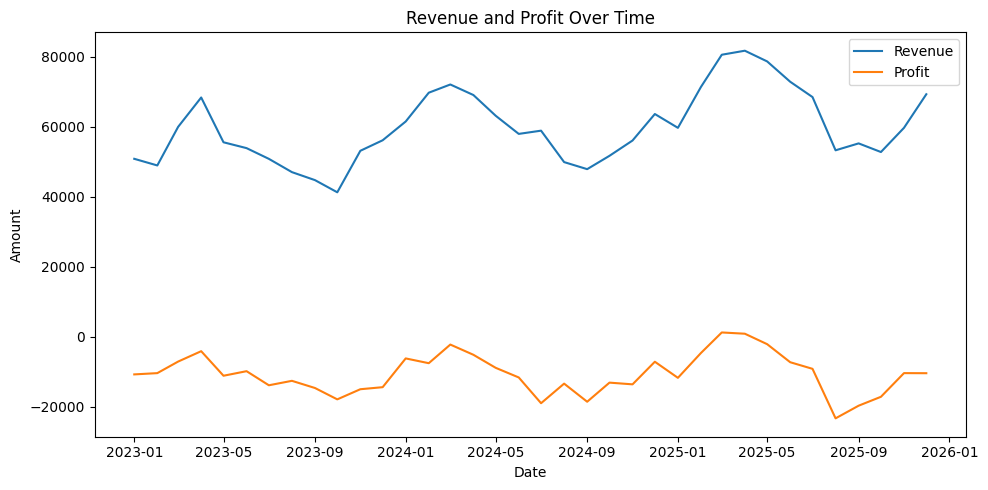

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(df_plot["date"], df_plot["revenue"], label="Revenue")
plt.plot(df_plot["date"], df_plot["profit"], label="Profit")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.title("Revenue and Profit Over Time")
plt.legend()
plt.tight_layout()
plt.show()


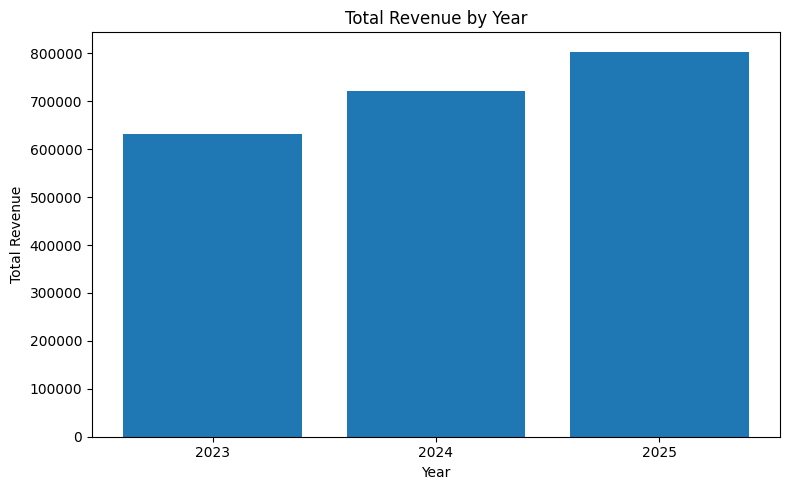

In [30]:
df_plot["year"] = df_plot["date"].dt.year
yearly = df_plot.groupby("year")[["revenue", "profit"]].sum()

yearly
plt.figure(figsize=(8, 5))
plt.bar(yearly.index.astype(str), yearly["revenue"])
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Year")
plt.tight_layout()
plt.show()


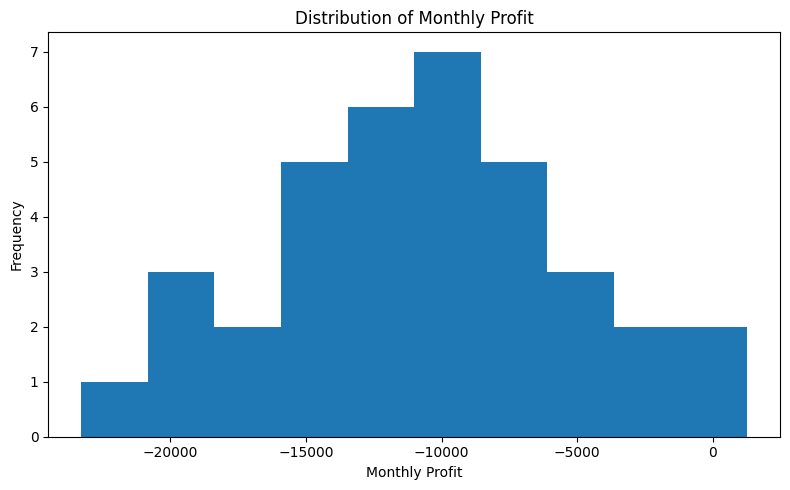

In [31]:
plt.figure(figsize=(8, 5))
plt.hist(df_plot["profit"], bins=10)
plt.xlabel("Monthly Profit")
plt.ylabel("Frequency")
plt.title("Distribution of Monthly Profit")
plt.tight_layout()
plt.show()


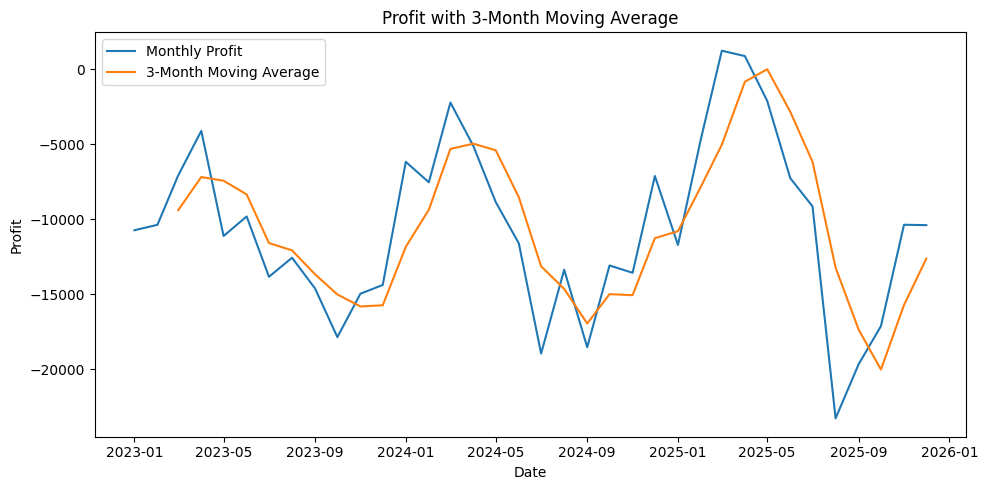

In [32]:
df_plot["profit_rolling_3"] = df_plot["profit"].rolling(window=3).mean()

plt.figure(figsize=(10, 5))
plt.plot(df_plot["date"], df_plot["profit"], label="Monthly Profit")
plt.plot(df_plot["date"], df_plot["profit_rolling_3"], label="3-Month Moving Average")
plt.xlabel("Date")
plt.ylabel("Profit")
plt.title("Profit with 3-Month Moving Average")
plt.legend()
plt.tight_layout()
plt.show()


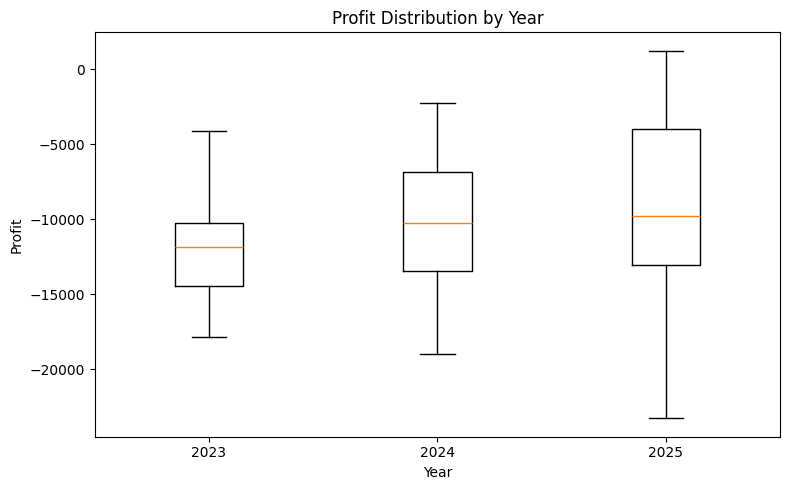

In [37]:
df_plot["year"] = df_plot["date"].dt.year
years = sorted(df_plot["year"].unique())
data_by_year = [df_plot.loc[df_plot["year"] == y, "profit"] for y in years]

plt.figure(figsize=(8, 5))
plt.boxplot(data_by_year, tick_labels=[str(y) for y in years])

plt.xlabel("Year")
plt.ylabel("Profit")
plt.title("Profit Distribution by Year")
plt.tight_layout()
plt.show()


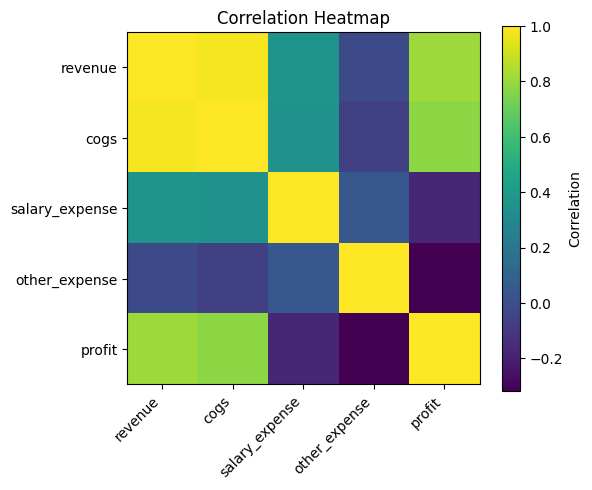

In [35]:
numeric_cols = ["revenue", "cogs", "salary_expense", "other_expense", "profit"]
corr = df_plot[numeric_cols].corr()

corr

plt.figure(figsize=(6, 5))
plt.imshow(corr, interpolation="nearest")
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha="right")
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.colorbar(label="Correlation")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()
